In [1]:
import numpy as np
import pandas as pd
import os
from rendering_turing import renduFitness, renduModel
from rendering_kilotron import *
from rendering_sensibilite import *
import pandas as pd

Debut du test de l'extracteur des proprietes de l'essaim sur le chemin :  /home/mohamed/Bureau/kilobot_ancien/Projet_Kilobots
Debut du test de l'extracteur des proprietes de l'essaim sur le chemin :  /home/mohamed/Bureau/kilobot_ancien/Projet_Kilobots


## Partie 01 : Modification des paramètres de l'équation diffusion par CMA-ES
### Auteurs : Milo et Mohamed
Dans cette partie nous présentons les résultats que nous avons obtenu durant l'étude d'une approche permettant l'optimisation des paramètres de réaction diffusion par un algorithme CMA-ES.
#### 1/Interface Simulateur et Mesures implémentées : 
Pour les besoins de la simulation nous avons développé et intégré à notre code une interface
qui nous permettait d'executer des simulations et plusieurs fonctions permettant de calculer différentes mesures
caractérisant la structure de l'essaim.
Par exemple, une execution classique se fait comme suit : 

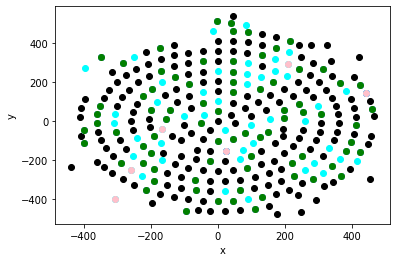

In [3]:
from Src.controllers.swarmDescriptor import swarmDescriptor
"""
Le paramètre précisé sert a distinguer 
le simulateur avec lequel on interragis
"""
SD = swarmDescriptor("morphogenesis")
SD.controller.rez_params()
SD.setTime(1500)
SD.controller.withVisiblite(True)
SD.setTopology("pile")
SD.setNb_robots(300)
SD.executeSimulation()
SD.genererRendu()

Ensuite le calcul de plusieurs mesures a été implémenté : 

{'id': 1, 'size': 293, 'shape_index': 1.6661061074117263, 'rectangliude': 0, 'elements': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 

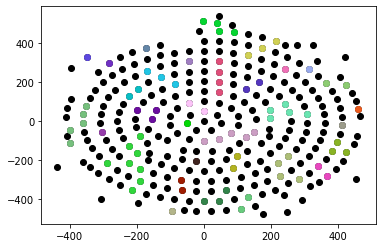

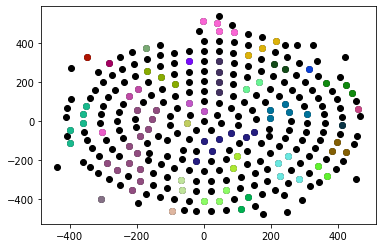

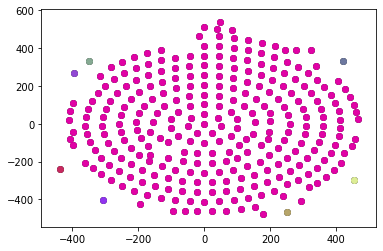

In [5]:
#Calcul des shapes index des différents clusters
SD.clusteriser()
SD.shapeIndex()
for c in SD.clusters:
    print(c)
#Ceci permet de calculer le nombre de Turing Spot
SD.calculerTuringSpots(4)
SD.renduTuringSpot(restedespoints=True)
SD.calculerTuringSpots(2)
SD.renduTuringSpot(restedespoints=True)
#Utiliser 0 par seuil peut s'avérer utile pour visualiser les clusters (une couleur par cluster)
SD.shapeIndex()
SD.rectanglitude()
SD.calculerTuringSpots(0)
SD.renduTuringSpot(True)

#### 2/Algorithme évolutionnaire : 
A présent que l'interface et les mesures ont étés implémentés, nous pouvons essayer différentes façons de modifier 
les paramètres de l'équation de réaction diffusion.
Pour se faire il faut déterminer 4 choses : 
* Paramètrage du CMA-ES
* Paramètrage de la simulation
* Fonction Fitness
* Structure du génotype (les variables à modifier) 

Nous allons aborder les trois aspects et leur impact sur l'optimisation de l'essaim de ce qui suivra.

##### a)Fonction Fitness (naivement): 
D'abord, nous allons étudier l'impact de la variation de la fonction fitness sur l'éxécution du CMA-ES
Nous fixerons naivement les paramètres de la simulation et le génotype sera composé de tous les paramètres
de l'équation de réaction diffusion.
Nous executons chaque algorithme sur 200 itérations puis nous affichons un rendu.

D'abord nous commençons par expérimenter l'utilisation du nombre de Turing Spots

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=978625, Sun Mar 22 19:36:11 2020)
Amélioration du nombre de turing Spot :  1


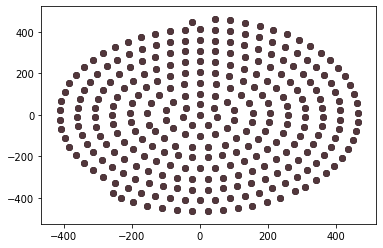

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -1.000000000000000e+00 1.0e+00 9.24e-01  9e-01  9e-01 1:18.8
    2     20 0.000000000000000e+00 1.2e+00 9.21e-01  9e-01  9e-01 2:37.4


/home/mohamed/.local/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=0.000000, sigma=9.21e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=2)
  ')')


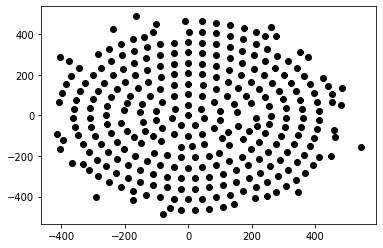

In [7]:
renduFitness("Turing Spot",20,sigma = 1)
#Affichage des concentrations 

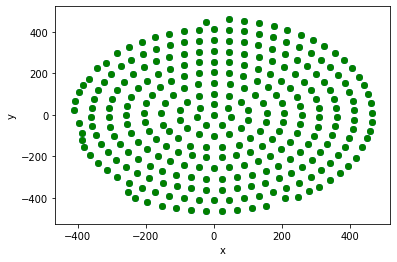

                    0  1
0         19056175104  0
1        306704384000  0
2        308013400064  0
3        307335364608  0
4        308268597248  0
..                ... ..
295    91996991520768  0
296    89149000384512  0
297    86318096842752  0
298    87911764590592  0
299  1474451266863104  0

[300 rows x 2 columns]


In [9]:
SD.setTime(2000)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Comme on peut le constater pour un sigma grand ça crée un overflow sur les registres ce qui empéche l'algorithme de modifier de façon perceptible les paramètres.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=1036155, Sun Mar 22 19:40:04 2020)
Amélioration du nombre de turing Spot :  33


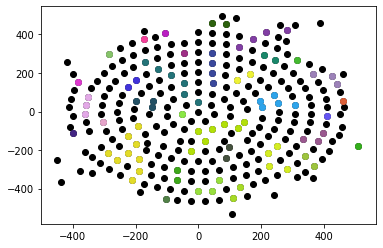

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -3.300000000000000e+01 1.0e+00 9.49e-04  9e-04  1e-03 1:22.0
Amélioration du nombre de turing Spot :  34


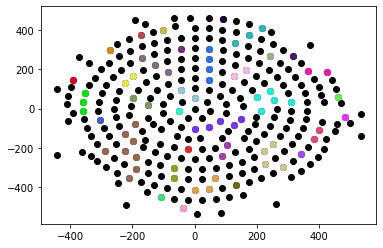

    2     20 -3.400000000000000e+01 1.2e+00 9.51e-04  9e-04  1e-03 2:43.7
    3     30 -3.400000000000000e+01 1.3e+00 9.05e-04  9e-04  9e-04 4:05.4
    4     40 -3.400000000000000e+01 1.3e+00 8.72e-04  8e-04  9e-04 5:26.5
    5     50 -3.400000000000000e+01 1.5e+00 7.86e-04  7e-04  8e-04 6:48.7


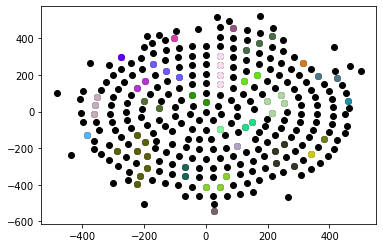

In [10]:
SD.controller.rez_params()
renduFitness("Turing Spot",50,sigma = 0.001)

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=970243, Sun Mar 22 19:48:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 -1.877086448831242e+00 1.0e+00 9.91e-04  1e-03  1e-03 1:39.7
    2     20 -1.981324915465331e+00 1.2e+00 1.01e-03  1e-03  1e-03 3:19.2
    3     30 -2.156839551488410e+00 1.3e+00 9.53e-04  9e-04  1e-03 4:58.8
    4     40 -2.020569730084012e+00 1.4e+00 9.63e-04  9e-04  1e-03 6:38.5


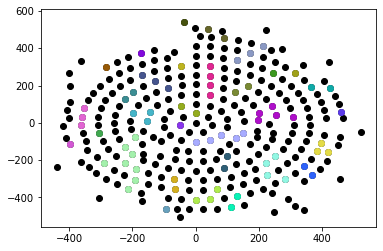

In [11]:
SD.controller.rez_params()
renduFitness("Shape Index",40,sigma = 0.001)

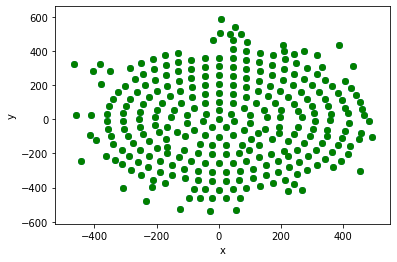

     0  1
0    0  1
1    5  2
2    0  1
3    0  1
4    1  1
..  .. ..
295  4  2
296  1  0
297  0  1
298  0  1
299  2  1

[300 rows x 2 columns]


In [12]:
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Pour un petit sigma ça fonctionne relativement bien, à noter cependant que certains paramètres sont trés peu impactants comme par exemple les coefficients de diffusion pour lesquels une variation de 0.001 n'est pas significative (car ils sont de l'ordre de 10²).
Nous profitons de ce rendu pour faire remarquer que maximiser le shape index conduit a la polarization de tous les robots.
##### b)Structure du génotype : 
Dans cette partie nous expérimentons le fait de modifier la structure du génotype, par exemple
nous pouvons considérer un génotype qui n'est pas composé des paramètres de la réaction mais seulement de la diffusion comme suit.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1043843, Sun Mar 22 19:55:21 2020)
Amélioration du nombre de turing Spot :  35


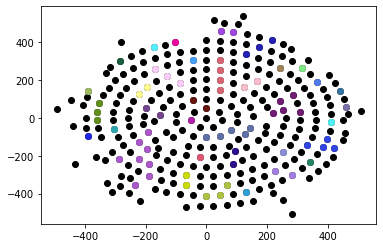

Amélioration du nombre de turing Spot :  40


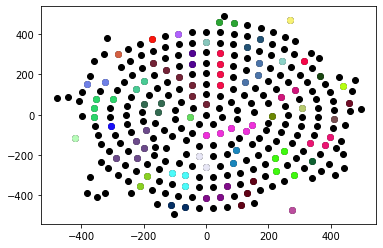

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -4.000000000000000e+01 1.0e+00 1.22e+00  1e+00  2e+00 0:52.0
    2     12 -3.900000000000000e+01 1.5e+00 1.20e+00  9e-01  2e+00 1:41.0
Amélioration du nombre de turing Spot :  43


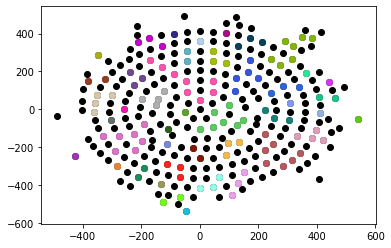

    3     18 -4.300000000000000e+01 1.8e+00 1.05e+00  7e-01  1e+00 2:29.9
Amélioration du nombre de turing Spot :  50


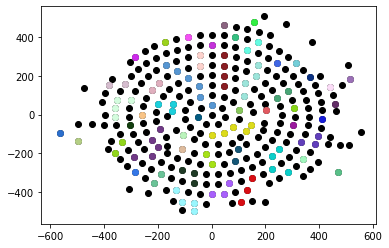

    4     24 -5.000000000000000e+01 1.6e+00 1.23e+00  7e-01  2e+00 3:19.0


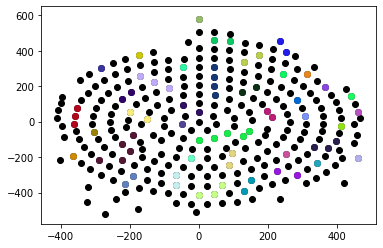

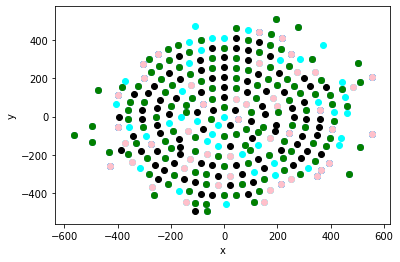

      0  1
0    -3  2
1    18  3
2    -5  2
3    -1  2
4    -7  2
..   .. ..
295  10  4
296  -2  2
297  -4  3
298   0  0
299  -2  2

[300 rows x 2 columns]


In [13]:
SD.controller.rez_params()
renduModel("Turing Spot",20,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1037020, Mon Mar 23 15:46:35 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -2.073469596167268e+01 1.0e+00 8.48e-01  7e-01  8e-01 1:00.8
    2     12 -2.918618197778435e+01 1.1e+00 8.80e-01  7e-01  9e-01 1:58.2
    3     18 -2.475448401686241e+01 1.3e+00 8.29e-01  7e-01  8e-01 2:54.2
    4     24 -2.638588583513356e+01 1.2e+00 7.91e-01  6e-01  7e-01 3:48.9
    5     30 -2.792469234075669e+01 1.1e+00 6.48e-01  4e-01  5e-01 4:44.2


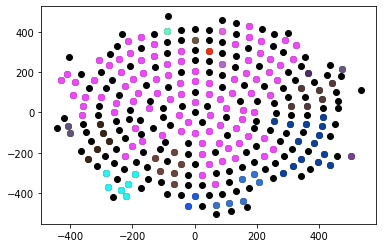

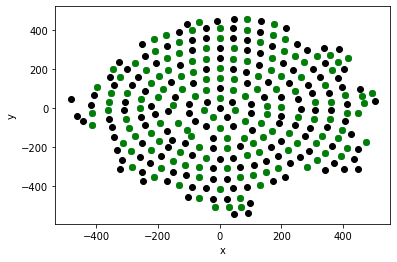

In [12]:
SD.controller.rez_params()
renduModel("Shape Index",30,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()

Donc on voit bien que dans les deux cas ça fonctionne beaucoup mieux de ne pas manipuler simultanément tous les paramètres. De plus la réduction de dimension garanti une convergence plus rapide.
De plus comme on n'influe pas sur la réaction il y a beaucoup moins de risques d'overflow sur les registres des robots comme on peut le voir.

##### b)Aggrégation de critères : 
A présent nous allons évaluer l'intéret d'utiliser une aggrégation des deux critères, d'abord l'aggrégation utilisée serra une multiplication afin de pénaliser les structures sans Turing Spot.
Ensuite nous utiliserons une addition ce qui sera semblable à l'utilisation d'un ordre lexicographique (Turing Spot > Shape Index) étant donné que Shape index est généralement inférieur a 2.

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1027645, Sun Mar 22 20:21:30 2020)


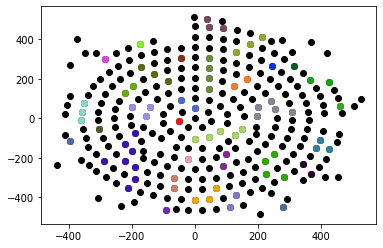

Nouvelle meilleur fitness a :  -60.77878607845061
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -6.077878607845061e+01 1.0e+00 8.66e-02  8e-02  8e-02 1:02.5


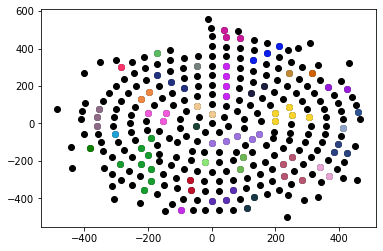

Nouvelle meilleur fitness a :  -63.111145023448415
    2     12 -6.311114502344842e+01 1.1e+00 7.74e-02  6e-02  7e-02 2:03.6
    3     18 -6.091308571793775e+01 1.1e+00 7.11e-02  5e-02  6e-02 3:03.4


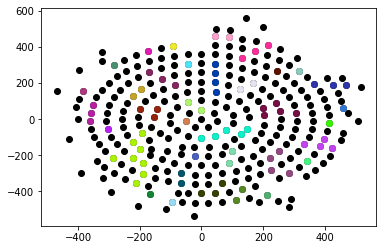

Nouvelle meilleur fitness a :  -66.59929141283342
    4     24 -6.659929141283342e+01 1.2e+00 6.66e-02  4e-02  5e-02 4:04.1
    5     30 -6.149739542835869e+01 1.2e+00 5.48e-02  3e-02  4e-02 5:04.1
    6     36 -6.320373502466728e+01 1.1e+00 6.30e-02  4e-02  5e-02 6:04.8
    7     42 -6.659929141283342e+01 1.4e+00 4.75e-02  2e-02  3e-02 7:04.4


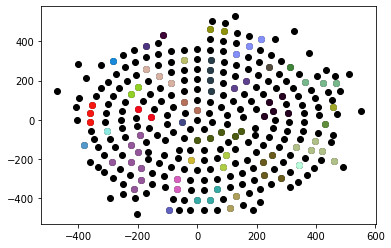

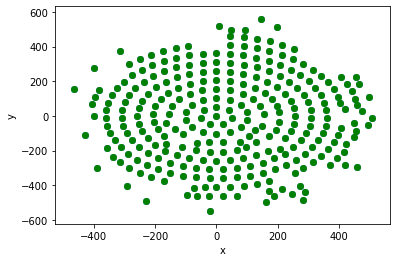

     0  1
0    0  1
1    5  2
2    0  1
3    0  1
4    1  2
..  .. ..
295  4  2
296  0  1
297  0  1
298  0  1
299  2  2

[300 rows x 2 columns]


In [19]:
SD.controller.rez_params()
renduModel("Aggregation Multiplication",40,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=991120, Sun Mar 22 20:29:43 2020)


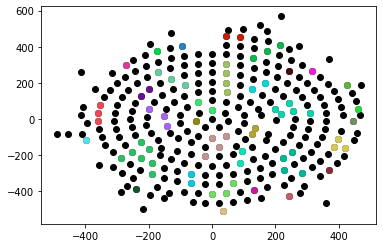

Nouvelle meilleur fitness a :  -34.64663751579826


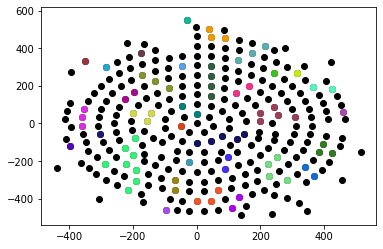

Nouvelle meilleur fitness a :  -34.718776571867394
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -3.471877657186739e+01 1.0e+00 8.54e-02  7e-02  8e-02 0:57.0


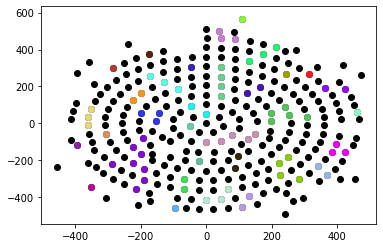

Nouvelle meilleur fitness a :  -34.86366017648485
    2     12 -3.486366017648485e+01 1.3e+00 7.97e-02  6e-02  7e-02 1:54.7


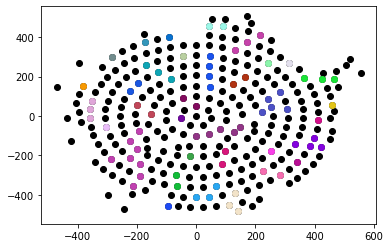

Nouvelle meilleur fitness a :  -35.5706099214915
    3     18 -3.557060992149150e+01 1.4e+00 8.69e-02  7e-02  7e-02 2:52.0


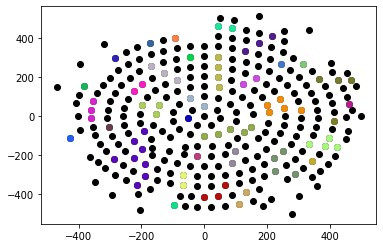

Nouvelle meilleur fitness a :  -35.58974433866709


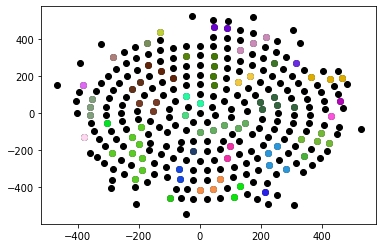

Nouvelle meilleur fitness a :  -36.55172690229858
    4     24 -3.655172690229858e+01 1.2e+00 8.54e-02  6e-02  7e-02 3:50.4


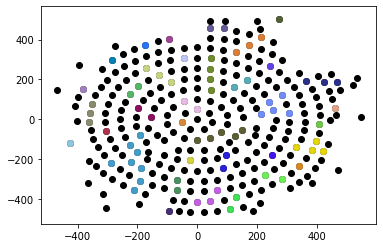

Nouvelle meilleur fitness a :  -36.57044230436247
    5     30 -3.657044230436247e+01 1.2e+00 9.45e-02  6e-02  9e-02 4:47.7


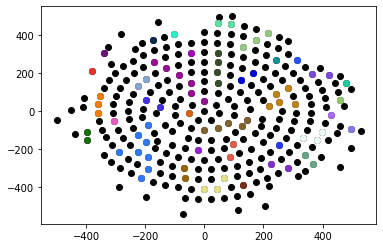

Nouvelle meilleur fitness a :  -36.74845129050552
    6     36 -3.674845129050552e+01 1.4e+00 1.53e-01  1e-01  2e-01 5:43.8


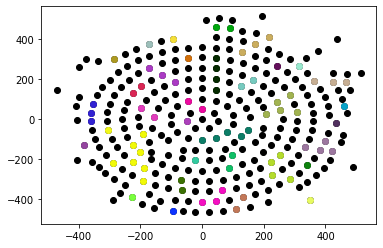

Nouvelle meilleur fitness a :  -36.77003052473199
    7     42 -3.677003052473199e+01 1.6e+00 1.26e-01  8e-02  1e-01 6:40.1


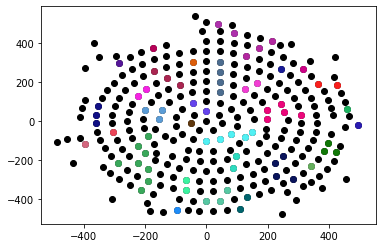

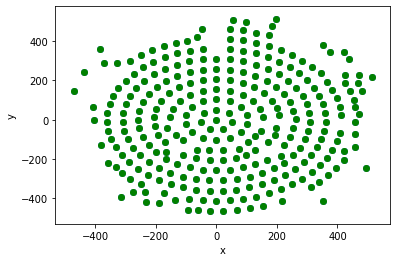

     0  1
0    0  1
1    5  2
2    0  1
3    0  1
4    1  2
..  .. ..
295  6  3
296  3  2
297  0  1
298  1  2
299  0  0

[300 rows x 2 columns]


In [4]:
SD.controller.rez_params()
renduModel("Aggregation Addition",40,sigma = 1,Model=("D_u","D_v"))
SD.setTime(2500)
SD.executeSimulation()
SD.genererRendu()
df = pd.DataFrame(SD.concentrations)
print(df)

Le deux résolutions atteignent relativement bien leur objectif et reste assez équivalentes.
Dans les deux nous constatons un résultat sensiblement plus intéressant que celui proposé par le paramètrage par défaut ce qui constitue déja une progression tangible.

## Partie 02 : Prédiction d'une topologie en utilisant des réseaux de neurones
### Auteurs : Louis et Mohamed
Les deux problématiques principales auxquelles nous avons pu nous confronter dans cette partie sont liées à : 
* La gestion du temps de calculs dans le cas de réseau de neurones trés grand
* Le cout à optimiser
* La structure de réseau de neurones à adopter

#### 1/Gestion du temps de calcul:
Etant donné que l'optimisation des réseaux de neurones se fait sur simulateur, la première contribution ici consiste a créer une version alternative du code s'executant sur les kilobots et qui puisse s'éxécuter sur processeur graphique ce qui accélère considérable la vitesse de simulation pour des réseaux de neurones profonds.
De plus l'ensemble des opérations du CMA-ES est effectué sur GPU grâce a Tensorflow.
La variation de temps d'éxécution en fonction du nombre de poids à optimiser est donnée par la courbe suivante : 
![40% center](GPUCPU.png)

#### 2/Architecture :
Afin d'évaluer une architecture correcte pour commencer à essayer d'apprendre à prédir les formes nous allons d'abord nous intéresser a l'effet de la dite architecture sur les prédictions émises.
Il y'a donc deux sorties chacune sigmoide qui représenterons respectivement la probabilité que la forme soit une ligne et un cercle.
Nous fixons arbitrairement le nombre de canaux de communications a 3.

(11_w,22)-aCMA-ES (mu_w=6.5,w_1=26%) in dimension 441 (seed=676459, Sat May 16 05:59:34 2020)
Iteration  1  : 
Nouvelle meilleure Precision :  0.5
Iteration  2  : 
Iteration  3  : 
Iteration  4  : 
Iteration  5  : 
Iteration  6  : 
Iteration  7  : 
Iteration  8  : 
Iteration  9  : 
Iteration  10  : 
Iteration  11  : 
Iteration  12  : 
Iteration  13  : 
Iteration  14  : 
Iteration  15  : 
Iteration  16  : 
Iteration  17  : 
Iteration  18  : 
Iteration  19  : 
Iteration  20  : 
Iteration  21  : 
Iteration  22  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     22 -5.000000000000000e-01 1.0e+00 9.85e-03  1e-02  1e-02 2:57.0


/home/mohamed/.local/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.500000, sigma=9.85e-03).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1)
  ')')


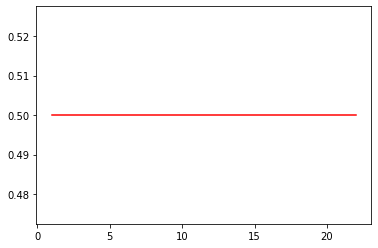

In [3]:
shape = dict(
        NEURONES = 15,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.01,fitnessPrecision,shape)

Comme on peut le voir les résultats sont pitoyables, la raison de cela est facile à comprendre en observant les prédictions.

In [4]:
SK = swarmDescriptor("kilotron_cuda")
SK.readDatas()
print(SK.predictions)

NameError: name 'swarmDescriptor' is not defined

Comme on peut le voire les prédictions ne varient pas en fonction des points de l'essaim en dépit de la variation des U et des V, pour éclaircir cette situation nous avons étudié l'effet du nombre de neurones par couche caché sur un architecture avec deux couches cachées.
Donc nous allons afficher les courbes correspondant a l'évolution de la variance moyennes des prédictions et du temps moyen d'éxécution en fonction du nombre de neurones.

Simulation pour une shape de :  15.0  finie en :  6.005935192108154
Simulation pour une shape de :  24.82758620689655  finie en :  5.896080017089844
Simulation pour une shape de :  34.6551724137931  finie en :  6.083733797073364
Simulation pour une shape de :  44.48275862068965  finie en :  6.117029428482056
Simulation pour une shape de :  54.310344827586206  finie en :  6.183273553848267
Simulation pour une shape de :  64.13793103448276  finie en :  6.193031549453735
Simulation pour une shape de :  73.9655172413793  finie en :  6.4276463985443115
Simulation pour une shape de :  83.79310344827586  finie en :  6.432480573654175
Simulation pour une shape de :  93.62068965517241  finie en :  6.586118221282959
Simulation pour une shape de :  103.44827586206897  finie en :  6.7169718742370605
Simulation pour une shape de :  113.27586206896552  finie en :  6.554987668991089
Simulation pour une shape de :  123.10344827586206  finie en :  6.646444320678711
Simulation pour une shape de :  132.9

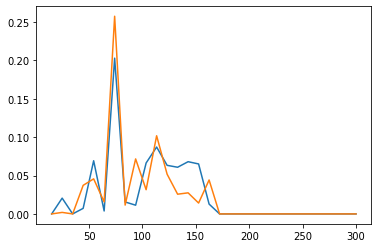

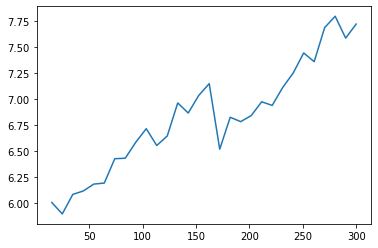

In [2]:
#Ne pas réexecuter ça prend excessivement longtemps à compute sauf en changeant le max et le nombre de points
plot_variance_neuronnes(min=15,max=300,hidden = 1,points = 30)

Comme on peut le voie la variance des prédictions entre les différents robots est trés affectée par le nombre de neurones et elle s'annule pour plus de 170 neurones environ et est également trés faible pour des petits nombres de neurones.
Nous prendrons 140 neurones pour avoir un bon compromis entre temps et variance des prédictions.
A noter aussi le temps d'éxécution qui peut atteindre jusqu'a 60 secondes ce qui rendrait le calcul beaucoup trop long pour être envisageable.

(13_w,26)-aCMA-ES (mu_w=7.6,w_1=23%) in dimension 1566 (seed=676432, Sat May 16 14:41:39 2020)
Iteration  1  : 
Iteration  2  : 
Nouvelle meilleure Precision :  0.7166666666666667
Iteration  3  : 
Iteration  4  : 
Iteration  5  : 
Iteration  6  : 
Iteration  7  : 
Iteration  8  : 
Iteration  9  : 
Iteration  10  : 
Iteration  11  : 
Nouvelle meilleure Precision :  0.8
Iteration  12  : 
Iteration  13  : 
Iteration  14  : 
Iteration  15  : 
Iteration  16  : 
Iteration  17  : 
Iteration  18  : 
Iteration  19  : 
Nouvelle meilleure Precision :  0.85
Iteration  20  : 
Iteration  21  : 
Iteration  22  : 
Iteration  23  : 
Iteration  24  : 
Iteration  25  : 
Iteration  26  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     26 -8.500000000000000e-01 1.0e+00 7.96e-01  8e-01  8e-01 2:44.0
Iteration  27  : 
Iteration  28  : 
Iteration  29  : 
Iteration  30  : 
Iteration  31  : 
Iteration  32  : 
Iteration  33  : 
Iteration  34  : 
Iteration  35  : 
Iteration  36 

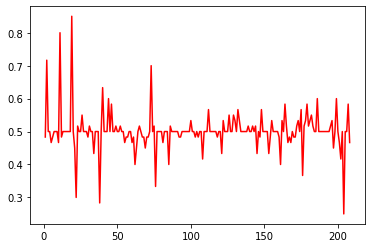

In [3]:
#71% with seed : 793932 Neurones = 120 , Hidden = 2
#78% with seed 746366 Neurones = 120, hidden = 1
#85% with seed 676432 Neurones = 120, Hidden = 1 : 85% (200 Itérations, Sigma= 0.8)
shape = dict(
        NEURONES = 120,
        HIDDEN = 1
    )
optimizeNeuralNetwork(200,0.8,fitnessPrecision,shape)

In [1]:
import random
random.seed(a=1082503, version=2)
shape = dict(
        NEURONES = 110,
        HIDDEN = 1
    )
optimizeNeuralNetwork(100,1,fitnessPrecision,shape)

NameError: name 'optimizeNeuralNetwork' is not defined

In [ ]:
import random
random.seed(a=1082503, version=2)
shape = dict(
        NEURONES = 110,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.1,fitnessPrecision,shape)

(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 13646 (seed=669670, Sat May 16 13:00:22 2020)
Iteration  1  : 
Nouvelle meilleure Precision :  0.5
Iteration  2  : 
Iteration  3  : 
Iteration  4  : 
Iteration  5  : 
Iteration  6  : 
Iteration  7  : 
Iteration  8  : 
Iteration  9  : 
Iteration  10  : 
Iteration  11  : 
Iteration  12  : 
Iteration  13  : 
Iteration  14  : 
Iteration  15  : 
Iteration  16  : 
Iteration  17  : 
Iteration  18  : 
Iteration  19  : 
Iteration  20  : 
Iteration  21  : 
Iteration  22  : 
Iteration  23  : 
Iteration  24  : 
Iteration  25  : 
Iteration  26  : 
Iteration  27  : 
Iteration  28  : 
Iteration  29  : 
Iteration  30  : 
Iteration  31  : 
Iteration  32  : 


Nous voyons que ça fonctionne relativement bien, non sans une grosse dose de chance et un trés grand nombre d'essais de prières.
La courbe en rouge représente la courbe d'apprentissage qui comme on le voit fluctue beaucoup étant donné la grande variance des prédictions.
Aussi étant donné que le choix de la structure a été guidé par la variance des prédictions nous avons codé une fonction permettant de donner des résultats plus détaillés sur l'effet de l'architecture sur la prédiction

In [2]:
shape = dict(
        NEURONES = 120,
        HIDDEN = 2
    )
"""
@params : 
        -shape : Structure du réseau de neurones formaté comme dans l'exemple
        -iter=5: Nombre d'itérations utilisé pour le calcul des moyennes
        -init_param =(0,1): Moyenne et Variance des poids intitialisés par défaut
        -verbose=False : permet de printer les résultats
        
"""
analysePredictions(shape,iter=5,init_param = (0,1),verbose=True)

Résultats moyens fait sur  5  ittérations.
MATRICE DE COVARIANCE P1,P2 -> U,V :
[[-0.01893771 -0.00944172]
 [ 0.00859221  0.00357016]]
COVARIANCE P1-> P2 : -0.0009274499788743254
VARIANCE P1 , P2 :  [[0.06849035 0.07363436]]
TEMPS MOYEN :  16.079622745513916


(array([[0.06849035, 0.07363436]]), 16.079622745513916)

#### 3/Coût a optimiser :
Etant donné que le problème est un problème de classification nous avons essayé d'implémenter d'autres manières d'évaluer la performances des différents classeurs.
Nous considérerons pour ce qui suit une version plus light du réseau de neurones précédent pour des raison évidentes de temps.

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 5886 (seed=1091006, Mon Mar 23 12:30:29 2020)
Iteration  1  : 
Nouvelle meilleure Précision :  0.5
Iteration  2  : 
Iteration  3  : 
Iteration  4  : 
Iteration  5  : 
Iteration  6  : 
Iteration  7  : 
Iteration  8  : 
Iteration  9  : 
Iteration  10  : 
Iteration  11  : 
Iteration  12  : 
Iteration  13  : 
Iteration  14  : 
Iteration  15  : 
Iteration  16  : 
Iteration  17  : 
Iteration  18  : 
Iteration  19  : 
Iteration  20  : 
Iteration  21  : 
Iteration  22  : 
Iteration  23  : 
Iteration  24  : 
Iteration  25  : 
Iteration  26  : 
Iteration  27  : 
Iteration  28  : 
Iteration  29  : 
Iteration  30  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 -5.000000000000000e-01 1.0e+00 9.98e-02  1e-01  1e-01 5:11.9


/home/mohamed/.local/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=-0.500000, sigma=9.98e-02).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=1)
  ')')


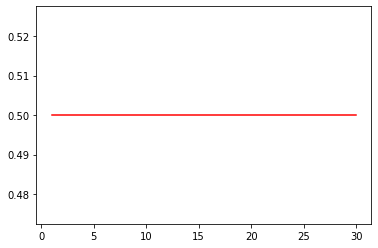

In [3]:
#Version plus light qui servira a montrer l'intéret de prendre un autre coût
shape = dict(
        NEURONES = 70,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.1,fitnessPrecision,shape)

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 5886 (seed=1040369, Mon Mar 23 12:55:25 2020)
Etape  1  : 
Etape  2  : 
Etape  3  : 
Etape  4  : 
Etape  5  : 
Précision :  0.5333333333333333
Penalite :  28
Etape  6  : 
Etape  7  : 
Etape  8  : 
Etape  9  : 
Etape  10  : 
Etape  11  : 
Etape  12  : 
Etape  13  : 
Etape  14  : 
Etape  15  : 
Etape  16  : 
Etape  17  : 
Etape  18  : 
Etape  19  : 
Etape  20  : 
Etape  21  : 
Etape  22  : 
Etape  23  : 
Etape  24  : 
Etape  25  : 
Etape  26  : 
Etape  27  : 
Etape  28  : 
Etape  29  : 
Etape  30  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 2.800000000000000e+01 1.0e+00 9.98e-02  1e-01  1e-01 5:22.2


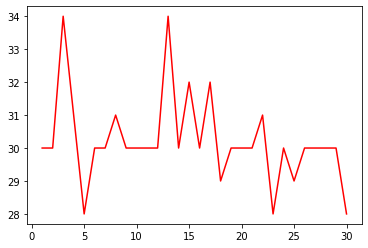

In [4]:
shape = dict(
        NEURONES = 70,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.1,fitnessHinge,shape)

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 5886 (seed=996682, Mon Mar 23 13:10:28 2020)
Etape  1  : 
Précision :  0.5
Penalite :  24.059822406229745
Etape  2  : 
Penalite :  22.09188309563624
Etape  3  : 
Etape  4  : 
Penalite :  21.57638154702942
Etape  5  : 
Etape  6  : 
Penalite :  20.403504688390054
Etape  7  : 
Etape  8  : 
Penalite :  19.77283641766408
Etape  9  : 
Etape  10  : 
Etape  11  : 
Etape  12  : 
Etape  13  : 
Etape  14  : 
Etape  15  : 
Etape  16  : 
Etape  17  : 
Etape  18  : 
Etape  19  : 
Etape  20  : 
Etape  21  : 
Etape  22  : 
Etape  23  : 
Etape  24  : 
Etape  25  : 
Etape  26  : 
Etape  27  : 
Etape  28  : 
Penalite :  19.379434097753265
Etape  29  : 
Etape  30  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 1.937943409775326e+01 1.0e+00 9.98e-02  1e-01  1e-01 5:15.6


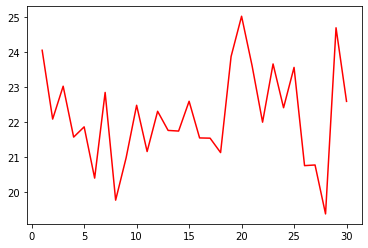

In [3]:
shape = dict(
        NEURONES = 70,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.1,fitnessLeastSquare,shape)

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 5886 (seed=1043984, Mon Mar 23 13:16:32 2020)
Etape  1  : 
Précision :  0.5
Nouvelle meilleure loss :  1.3965935355762513
Etape  2  : 
Nouvelle meilleure loss :  1.3831179335169435
Etape  3  : 
Etape  4  : 
Etape  5  : 
Etape  6  : 
Etape  7  : 
Etape  8  : 
Etape  9  : 
Etape  10  : 
Nouvelle meilleure loss :  1.38171858890995
Etape  11  : 
Etape  12  : 
Nouvelle meilleure loss :  1.3743000668607852
Etape  13  : 
Etape  14  : 
Etape  15  : 
Etape  16  : 
Etape  17  : 
Etape  18  : 
Etape  19  : 
Etape  20  : 
Etape  21  : 
Etape  22  : 
Etape  23  : 
Etape  24  : 
Etape  25  : 
Etape  26  : 
Etape  27  : 
Etape  28  : 
Etape  29  : 
Etape  30  : 
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 1.374300066860785e+00 1.0e+00 9.98e-02  1e-01  1e-01 5:09.6


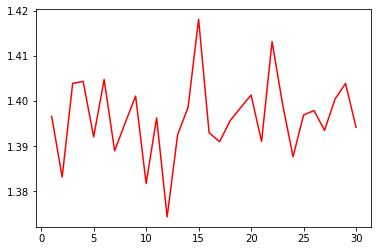

In [2]:
shape = dict(
        NEURONES = 70,
        HIDDEN = 2
    )
optimizeNeuralNetwork(10,0.1,fitnessLogLoss,shape)

## Partie 03 : Analyse de sensibilité des paramètres
### Auteurs : Cassy et Mohamed
Dans cette partie nous proposons une petite analyse de sensibilité visant a déterminer les intervalles dans lesquels les paramètres du modèle sont cohérents et aussi à comprendre leur influence sur les concentrations, les turing spot et le shape index.
Donc nous proposons à cet effet deux façon d'analyser les paramètres : 
* Une analyse des paramètres un à un
* Une analyse de sous ensemble de paramètres par PCA.



#### 1/ Analyse des paramètres un a un 
Pour se faire nous prenons le paramètrage par défaut et nous effectuons plusieurs simulations equidistantes afin de tracer les courbes représentatives des différentes variations que l'on veut étudier.

min =  -0.7200000000000001  max =  0.88  nombre de points =  20
A_VAL =  -0.7200000000000001
A_VAL =  -0.6357894736842106
A_VAL =  -0.5515789473684212
A_VAL =  -0.46736842105263166
A_VAL =  -0.3831578947368422
A_VAL =  -0.29894736842105274
A_VAL =  -0.21473684210526323
A_VAL =  -0.13052631578947382
A_VAL =  -0.04631578947368431
A_VAL =  0.0378947368421052
A_VAL =  0.1221052631578946
A_VAL =  0.20631578947368412
A_VAL =  0.29052631578947363
A_VAL =  0.37473684210526315
A_VAL =  0.45894736842105244
A_VAL =  0.543157894736842
A_VAL =  0.6273684210526315
A_VAL =  0.711578947368421
A_VAL =  0.7957894736842105
A_VAL =  0.88


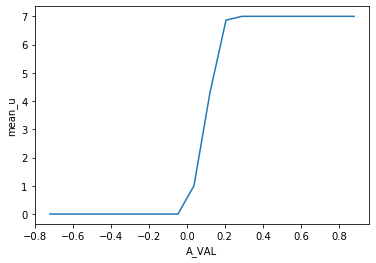

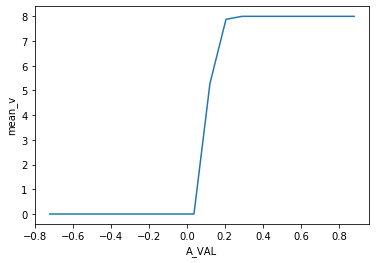

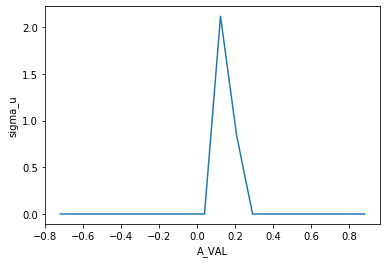

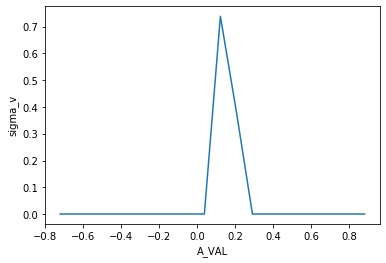

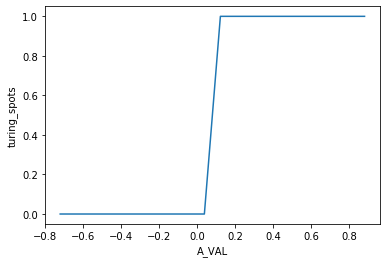

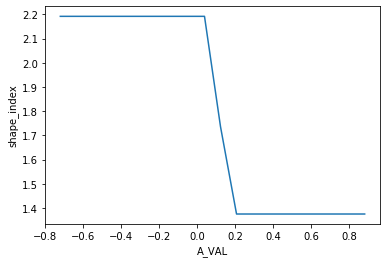

In [6]:
sensibilite_param("A_VAL",min=None,max=None,wideness=10,nb_points=20,display=("mean_u","mean_v","sigma_u","sigma_v","turing_spots","shape_index"))

min =  -0.27  max =  0.32999999999999996  nombre de points =  20
D_VAL =  -0.27
D_VAL =  -0.23842105263157898
D_VAL =  -0.2068421052631579
D_VAL =  -0.17526315789473684
D_VAL =  -0.1436842105263158
D_VAL =  -0.11210526315789476
D_VAL =  -0.0805263157894737
D_VAL =  -0.04894736842105263
D_VAL =  -0.01736842105263159
D_VAL =  0.014210526315789451
D_VAL =  0.04578947368421049
D_VAL =  0.07736842105263159
D_VAL =  0.10894736842105263
D_VAL =  0.14052631578947367
D_VAL =  0.17210526315789476
D_VAL =  0.2036842105263158
D_VAL =  0.23526315789473684
D_VAL =  0.2668421052631579
D_VAL =  0.2984210526315789
D_VAL =  0.32999999999999996


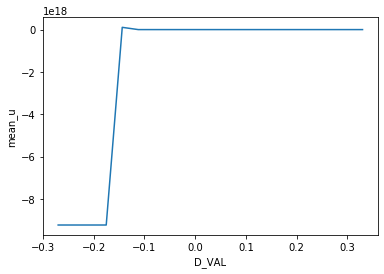

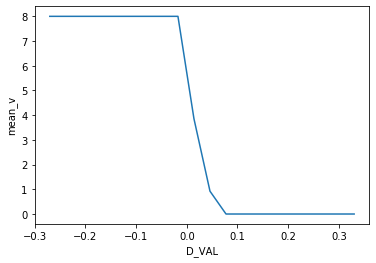

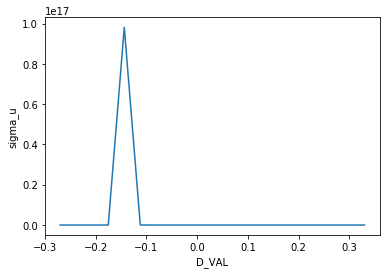

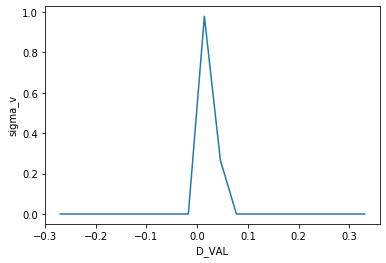

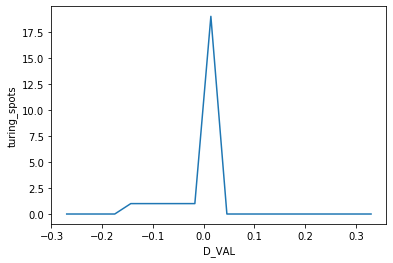

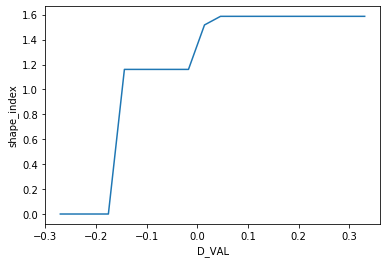

In [3]:
sensibilite_param("D_VAL",min=None,max=None,wideness=10,nb_points=20,display=("mean_u","mean_v","sigma_u","sigma_v","turing_spots","shape_index"))

min =  -4.5  max =  5.5  nombre de points =  20
D_u =  -4.5
D_u =  -3.973684210526316
D_u =  -3.447368421052632
D_u =  -2.9210526315789473
D_u =  -2.3947368421052633
D_u =  -1.8684210526315792
D_u =  -1.3421052631578947
D_u =  -0.8157894736842106
D_u =  -0.28947368421052655
D_u =  0.23684210526315752
D_u =  0.7631578947368416
D_u =  1.2894736842105257
D_u =  1.8157894736842106
D_u =  2.3421052631578947
D_u =  2.8684210526315788
D_u =  3.394736842105263
D_u =  3.921052631578947
D_u =  4.447368421052632
D_u =  4.973684210526315
D_u =  5.5


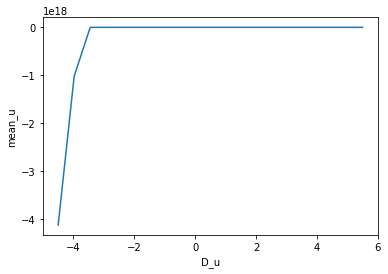

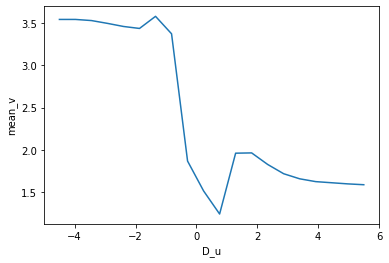

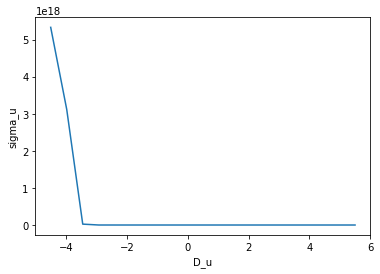

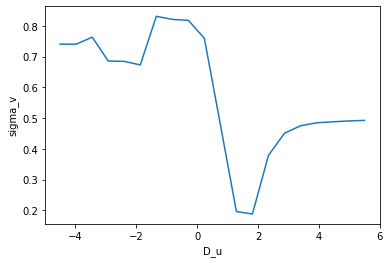

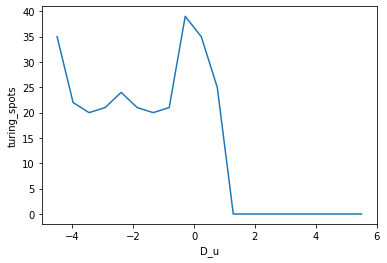

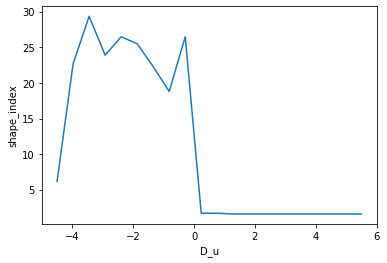

In [4]:
sensibilite_param("D_u",min=None,max=None,wideness=10,nb_points=20,display=("mean_u","mean_v","sigma_u","sigma_v","turing_spots","shape_index"))

#### 2/Analyse d'un sous ensemble de paramètres
Donc dans cette partie nous allons à chaque fois échantillonner des perturbations des paramètres par défaut, ensuite nous affichons en abscisse la projection PCA des données et en ordonnée les variations a étudier.

perturbation =  [-0.04374757 -0.4720215  -0.64246566]
perturbation =  [-0.57267326  0.09657302  0.30024706]
perturbation =  [-0.33617055 -1.37648572 -0.18890488]
perturbation =  [-0.48765754  0.54636059 -0.59224555]
perturbation =  [-0.3689419   0.70644616 -0.23421055]
perturbation =  [-0.12602234 -1.07499129  1.34699453]
perturbation =  [ 0.2895154  -0.65825333 -1.31480353]
perturbation =  [ 0.64876639 -0.17371529 -0.5205941 ]
perturbation =  [-0.40559837 -1.43752999  1.47851279]
perturbation =  [ 0.24087993 -0.88629173  0.27731699]
perturbation =  [-0.99054829 -1.70156057 -1.04858141]
perturbation =  [ 0.9686012   1.06554481 -1.27293603]
perturbation =  [0.33757708 0.8886104  0.56689971]
perturbation =  [-1.07010302 -1.04262752  0.586543  ]
perturbation =  [0.36110622 0.5464123  0.06317475]
perturbation =  [ 0.11336795 -1.9239284   1.64574393]
perturbation =  [ 1.51737242 -0.29066355 -0.52847187]
perturbation =  [-1.99125626  1.36225057  1.71455293]
perturbation =  [ 2.57799106 -0.39

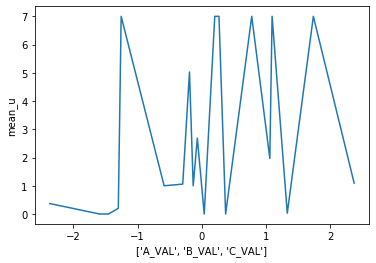

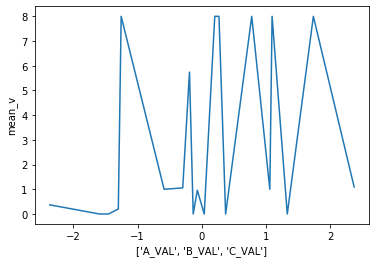

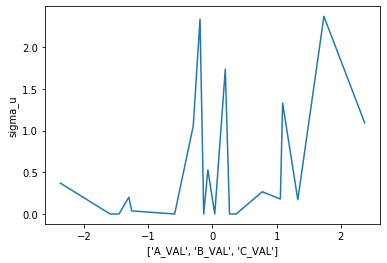

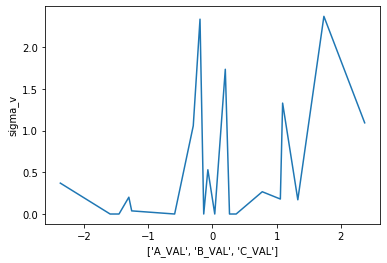

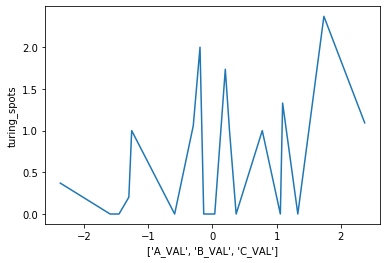

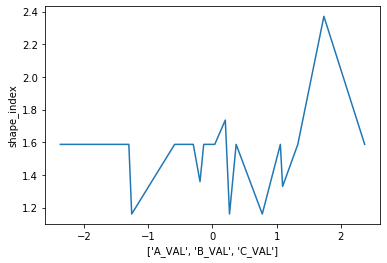

In [5]:
#Paramètres de la première équation de réaction
sensibilite_many(["A_VAL","B_VAL","C_VAL"],mean=0,sigma=1,nb_points=20,display=("mean_u","mean_v","sigma_u","sigma_v","turing_spots","shape_index"))

In [ ]:
#Paramètres de diffusion
sensibilite_many(["D_u","D_v"],mean=0,sigma=1,nb_points=20,display=("mean_u","mean_v","sigma_u","sigma_v","turing_spots","shape_index"))

perturbation =  [-2.1421353   0.47386833]
perturbation =  [ 1.37137515 -0.30054479]
perturbation =  [1.9609861  0.75385161]
perturbation =  [-1.10179019 -1.04711459]
perturbation =  [0.49619967 0.58998826]
perturbation =  [-0.85555046  2.22777685]
perturbation =  [-0.51558298 -0.20867849]
perturbation =  [ 1.27826155 -0.65232937]
perturbation =  [-0.20204438  1.25884079]
perturbation =  [ 1.23138896 -0.10245823]
perturbation =  [-0.48371996 -0.12470777]
perturbation =  [ 0.39648195 -1.57983872]


## Appedice

### Les questions que nous avons eu :
* A quel point l'analyse par composante principales préserve la structure de l'espace, en d'autres termes, si par exemple le nombre de turing spots augmentent quand la PCA en une dimension de A et de B augmentent est-ce que cela signifie que le nombre de Turing Spot augmente s'ils augmentent conjointement ? de façon générale comment intérpéter des résultats basés sur une ACP ?


* Que pensez vous de l'approche que nous avons adopté pour trouver une structure de réseau de neurones ? quelles sont vos orientations par rapport à ça ?

* Est-ce-que chercher une structure de réseau de neurones qui favorise la variance est la meilleure façon de garantir un bon apprentissage ? la covariance ne serait elle pas plus adaptée ? et si oui quel serait le calcul à faire pour déterminer le critère à maximiser (quand on utilisait la variance on faisait la somme des variances pour les probabilités prédites dans chaque classe) 

* Vers quelle fonction de coûts vous nous orienteriez, et aussi pensez vous que aggréger les erreurs effectuées dans la prédiction de chaque classe est une erreur et qu'il faudrait plûtot essayer de faire du multi-critères ?
Parce que dans l'état actuel des choses si une configurations donne 
0 erreurs sur un cercle
30 erreurs sur une ligne
La hinge loss (tout comme les autres loss) retournera 30 alors qu'une configuration qui en fait 17,17 et qui est normalement mieux aura une loss plus grande.

* Il nous est déja arrivé de minimiser une hinge loss continue (qui pénalise une erreur en fonction de la probabilité qu'elle a prédit) pensez vous que c'est une piste à suivre ? et si on utilisait un écart c'est a dire que si la prédiction est mauvaise on la pénalise en fonction de l'écart entre la probabilité prédite et celle qui a été prédite pour la bonne classe ?

* En minimisant une hinge loss continue nous avons remarqué que la loss pouvait vraiment se réduire sans pour autant augmenter la précision pensez vous que c'est normal ?

### Les priorités que vous souhaitez définir pour la semaine prochaine (pour chaque partie):

#### Partie 01 : 

#### Partie 02 : 

#### Partie 03 : 

### Remarques :